## Sentiment Analysis on Patient's Drug Reviews using Dataset from Drugs.com

Dataset location: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.<br />The data has the following attributes:

1. **drugName** (categorical): name of drug
2. **condition** (categorical): name of condition
3. **review** (text): patient review
4. **rating** (numerical): 10 star patient rating
5. **date** (date): date of review entry
6. **usefulCount** (numerical): number of users who found review useful

#### Data Source Credits:
Surya Kallumadi, Kansas State University, Manhattan, Kansas, USA (surya '@' ksu.edu)<br />
Felix Gräßer, Institut für Biomedizinische Technik, Technische Universität Dresden, Dresden, Germany (felix.graesser '@' tu-dresden.de

### Exploring the datasets
<b>Note:</b> The Drug Reviews datasets from Drugs.com are already available as splits into training (75%) and testing (25%) partitions and stored in two .tsv (tab-separated-values) files, respectively. But the files are still too huge and I have experienced that the processing of the data takes long time in some of the text-processing tasks used in this notebook in my laptop.

Hence I have used only the smaller file, renamed it as "drugsCom_raw.tsv" and used it as the base file for this project.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading data from the file

reviews = pd.read_table('./drugsCom_raw/drugsCom_raw.tsv')
reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [3]:
reviews.shape

(53766, 7)

The dataset has 53,766 rows of reviews with seven columns of attributes.

In [4]:
# Checking information on dtype, memory usage etc.

reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
Unnamed: 0     53766 non-null int64
drugName       53766 non-null object
condition      53471 non-null object
review         53766 non-null object
rating         53766 non-null float64
date           53766 non-null object
usefulCount    53766 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [5]:
# Checking if the datasets have null values

reviews.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [6]:
reviews.isnull().sum()

Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

The dataset has 295 rows with null values in the condition column, which is very small in numbers in comparision to the 53,766 rows of reviews in the dataset. Hence, we can remove the rows with null values.

In [7]:
# checking some of the rows with the null values before removing

nulls = reviews[reviews.isnull().any(axis=1)]
nulls.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
34,77164,Lorcaserin,NaN,"""Have had back and leg pain and sometimes arm ...",5.0,"May 27, 2014",21
146,192374,Drospirenone / ethinyl estradiol,NaN,"""I hate this birth control. I was originally t...",4.0,"April 13, 2015",8
156,165767,Levonorgestrel,NaN,"""I&#039;ve never had kids and I am 32 fyi. The...",7.0,"April 3, 2017",0
779,157589,Guaifenesin,NaN,"""You&#039;ll almost always notice a medicinal ...",9.0,"February 23, 2010",10
1017,96918,Conjugated estrogens / medroxyprogesterone,NaN,"""Has not worked one bit still have day and nig...",1.0,"July 6, 2015",5


In [8]:
# Removing rows with the null values

reviews = reviews.dropna()
reviews.shape

(53471, 7)

So, after removing the rows with null values the dataset still has 53,471 rows of reviews, which is sufficient for this analysis.

### Exploring the data contents

In [9]:
# Number of drugs present in the dataset?

drugs = reviews['drugName'].unique().tolist()
len(drugs)

2635

In [10]:
drugs

['Mirtazapine',
 'Mesalamine',
 'Bactrim',
 'Contrave',
 'Cyclafem 1 / 35',
 'Zyclara',
 'Copper',
 'Amitriptyline',
 'Methadone',
 'Levora',
 'Paroxetine',
 'Miconazole',
 'Belviq',
 'Seroquel',
 'Ambien',
 'Nuvigil',
 'Chantix',
 'Microgestin Fe 1 / 20',
 'Klonopin',
 'Ciprofloxacin',
 'Trazodone',
 'EnteraGam',
 'Aripiprazole',
 'Cyclosporine',
 'Oxybutynin',
 'Lurasidone',
 'Clonazepam',
 'Ciclopirox',
 'Sodium oxybate',
 'Lamotrigine',
 'Blisovi Fe 1 / 20',
 'Ivermectin',
 'Suprep Bowel Prep Kit',
 'Movantik',
 'Actos',
 'Duloxetine',
 'NuvaRing',
 'Escitalopram',
 'Tesamorelin',
 'Campral',
 'Gabapentin',
 'Levonorgestrel',
 'Aubra',
 'Plan B One-Step',
 'Ethinyl estradiol / etonogestrel',
 'Microgestin Fe 1.5 / 30',
 'Wellbutrin',
 'Benzoyl peroxide / clindamycin',
 'Etonogestrel',
 'Nitrofurantoin',
 'Ortho Tri-Cyclen Lo',
 'Tamsulosin',
 'Tofacitinib',
 'Cryselle',
 'Amphetamine / dextroamphetamine',
 'Clindamycin',
 'Pramipexole',
 'Skyla',
 'Lastacaft',
 'Effexor XR',
 'Nife

In [11]:
# Medical conditions covered in the dataset?

conditions = reviews['condition'].unique().tolist()
len(conditions)

708

In [12]:
conditions

['Depression',
 "Crohn's Disease, Maintenance",
 'Urinary Tract Infection',
 'Weight Loss',
 'Birth Control',
 'Keratosis',
 'Migraine Prevention',
 'Opiate Withdrawal',
 'Hot Flashes',
 'Vaginal Yeast Infection',
 'Schizoaffective Disorde',
 'Insomnia',
 'Narcolepsy',
 'Smoking Cessation',
 'Acne',
 'Bipolar Disorde',
 'Irritable Bowel Syndrome',
 'Keratoconjunctivitis Sicca',
 'Hyperhidrosis',
 'Panic Disorde',
 'Onychomycosis, Fingernail',
 'Rosacea',
 'Bowel Preparation',
 'Constipation, Drug Induced',
 'Diabetes, Type 2',
 'Pain',
 'Lipodystrophy',
 'Alcohol Dependence',
 'Emergency Contraception',
 'Major Depressive Disorde',
 'Anxiety',
 'Bladder Infection',
 'Benign Prostatic Hyperplasia',
 'Rheumatoid Arthritis',
 'Endometriosis',
 'ADHD',
 'Restless Legs Syndrome',
 'Conjunctivitis, Allergic',
 "Raynaud's Syndrome",
 'Schizophrenia',
 'Diabetes, Type 1',
 'Kidney Infections',
 'Generalized Anxiety Disorde',
 'Obesity',
 'Nausea/Vomiting',
 'Osteoarthritis',
 'Motion Sickness'

### Finding highly rated drugs
Since there are 2635 drugs covering 708 medical conditions in the dataset, it will be difficult to find a generalised highly rated medicine. So we need to find the highly rated medicines per medical condition, i.e., best medicines for treating respecitive medical condition based on patient's ratings.

Let's check drugs for treating a medical condition say, High Blood Pressure.

In [13]:
# Filtering rows for High Blood Pressure

reviews_con1 = reviews.loc[reviews['condition'].str.contains('High Blood Pressure')]
reviews_con1.head(8)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
94,167908,Minoxidil,High Blood Pressure,"""I have been prescribed this medicine cause I ...",1.0,"January 4, 2016",10
353,32615,Lisinopril,High Blood Pressure,"""This is a good medicine.""",10.0,"September 9, 2009",13
398,114107,Amlodipine,High Blood Pressure,"""I started taking 5 mg amlodipine about two mo...",2.0,"February 1, 2015",89
401,126410,Carvedilol,High Blood Pressure,"""After being on atenolol for about 30 years, s...",9.0,"February 19, 2013",59
465,32471,Lisinopril,High Blood Pressure,"""Before taking lisinopril, I was 100 lbs overw...",4.0,"May 28, 2014",75
470,163923,Methyldopa,High Blood Pressure,"""I&#039;m sure this medicine has its place in ...",3.0,"September 1, 2009",24
566,62863,Cozaar,High Blood Pressure,"""I have been taking Cozaar 50 mg 1per day com...",9.0,"January 14, 2013",163
682,76499,Azor,High Blood Pressure,"""After years of High Blood Pressure and a seri...",9.0,"April 19, 2010",22


In [14]:
# Finding weighted average rating for drugs from the above dataframe

uniq_drug = reviews_con1[['drugName', 'rating']].groupby(['drugName'], as_index=False).mean()
uniq_drug.head()

,drugName,rating
0,Adalat CC,7.000000
1,Aliskiren,6.833333
2,Aliskiren / hydrochlorothiazide,10.000000
3,Altace,9.500000
4,Amlodipine,4.000000


In [15]:
# Selecting only drugs with ratings more than 8.0 from the above dataframe

highly_rated_drugs = uniq_drug['rating'] >= 8.0
selected_drugs = uniq_drug[highly_rated_drugs]

uniq_drug.shape, selected_drugs.shape

((99, 2), (33, 2))

In [16]:
selected_drugs.head()

,drugName,rating
2,Aliskiren / hydrochlorothiazide,10.000000
3,Altace,9.500000
8,Amlodipine / olmesartan,8.421053
9,Amlodipine / telmisartan,9.500000
11,Atacand,8.000000


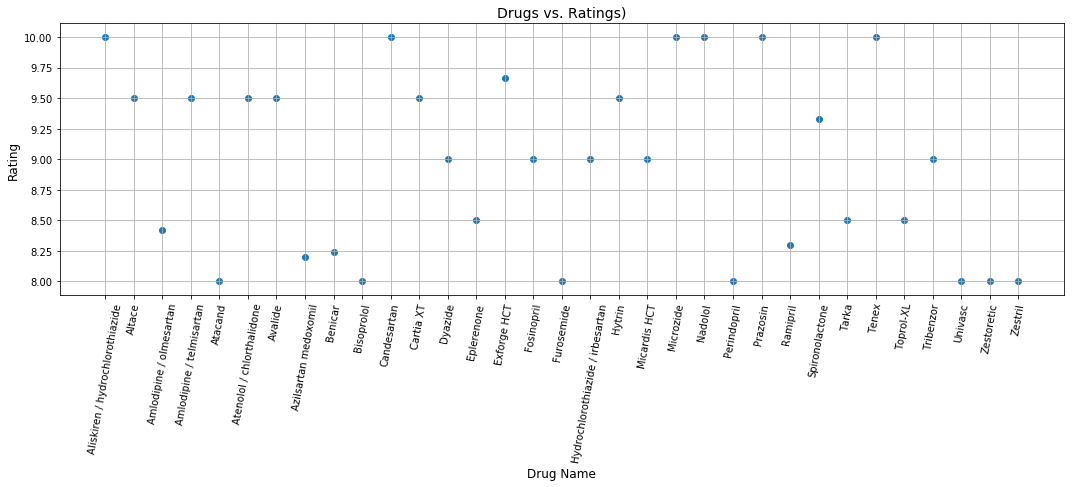

In [17]:
# Visualuisig the selected highly rated drugs

%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
fig.set_size_inches(18, 5)

axis.set_title('Drugs vs. Ratings)', fontsize=14)
axis.set_xlabel('Drug Name', fontsize=12)
axis.set_ylabel('Rating', fontsize=12)

Xaxis = selected_drugs['drugName']
Yaxis = selected_drugs['rating']

axis.scatter(Xaxis, Yaxis)
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

The above queries and plot shows the patient's **highly rated drugs** for **High Blood Pressure**. 

### Relative counts of each ratings

In [18]:
# Grouping ratings per rating sizes

ratings = reviews.groupby('rating').size()
ratings

rating
1.0      7265
2.0      2324
3.0      2197
4.0      1642
5.0      2691
6.0      2102
7.0      3075
8.0      6118
9.0      9120
10.0    16937
dtype: int64

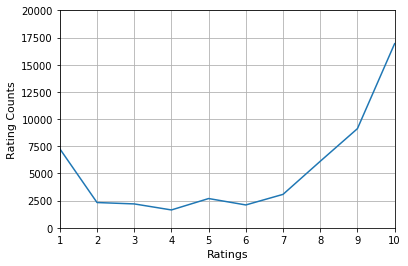

In [19]:
# Visualising the relative counts of each rating received

pd_ratings = pd.DataFrame(ratings, columns=['counts'])

plt.plot(pd_ratings.index, pd_ratings['counts'].values)
plt.xlabel('Ratings', fontsize=11)
plt.ylabel('Rating Counts', fontsize=11)
plt.axis([1, 10, 0, 20000])
plt.grid(True)
plt.show()

Most ratings are received towards the higher values.<br />
As per the `describe()` function (below), 50% reviews have 8 or more than 8 ratings.

In [20]:
reviews.describe()

,Unnamed: 0,rating,usefulCount
count,53471.000000,53471.000000,53471.000000
mean,116436.223617,6.976829,28.083634
std,67018.466874,3.286228,36.231706
min,0.000000,1.000000,0.000000
25%,58283.500000,4.000000,6.000000
50%,116369.000000,8.000000,16.000000
75%,174623.500000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


### Relation (if any) between review length and corresponding rating
Generally people write reviews when they want to express their experiences about the product. Let's see if the length of each reviews that users write, have any relation to the corresponding ratings that they provide. For that, first we need to find the length of each reviews.

In [21]:
# Finding the length of each reviews and adding them in the dataframe

reviews['review_len'] = reviews['review'].apply(len)
reviews.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_len
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,439
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,268
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,29
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,782
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,762


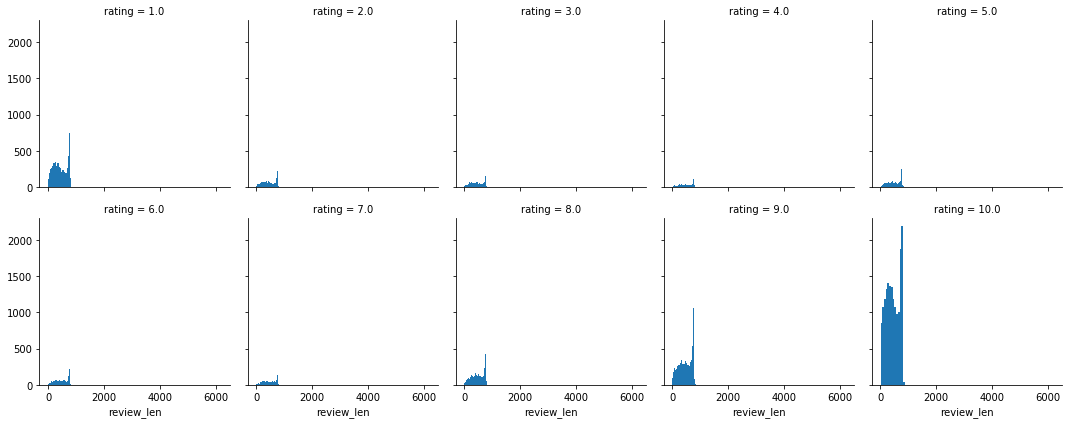

In [22]:
# Comparing review length to rating with histogram plot

import seaborn as sns

graph = sns.FacetGrid(data=reviews, col='rating', col_wrap=5)
graph.map(plt.hist, 'review_len', bins=100)

From the above histogram plots, it appears that the overall distribution of **review length** is similar across all ten ratings. However, the **number of reviews** are increasing towards the extreme ends; more for the higher ratings.

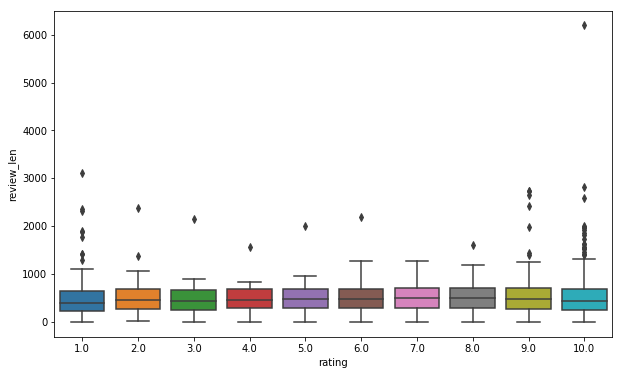

In [23]:
# Comparing review length to rating with box plot

plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='review_len', data=reviews)

From the above box plot, it appears that the extreme ratings like 1.0 and 10.0 have much longer review text, and the lower middle to upper middle ratings have shorter review texts. So it appears that people write more lengthy reviews when they have either **very good experience** or **very bad experience** with the product. For broader middle ratings, users generally do not write much in the reviews.

Because of this skewed pattern at the extreme ends, review length **might not** be an useful feature to consider to predict review rating.

### Corelation beteween data columns
Correlation statistics uses the numeric data columns only from the dataframe. So let's delete the unwanted numeric column **Unnamed: 0** before finding any correlation between the numeric columns **rating**, **usefulCount**, and **review_len**.

In [24]:
del reviews['Unnamed: 0']

In [25]:
reviews.head(3)

,drugName,condition,review,rating,date,usefulCount,review_len
0,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,439
1,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,268
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,29


Finding correlation between the features **rating**, **usefulCount** and **review_len**:

In [26]:
reviews.corr()

,rating,usefulCount,review_len
rating,1.000000,0.237362,0.024721
usefulCount,0.237362,1.000000,0.029188
review_len,0.024721,0.029188,1.000000


Let's visualise these correlations using the Seaborn heatmap.

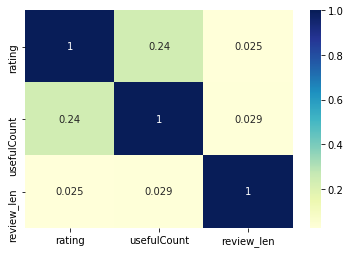

In [27]:
sns.heatmap(data=reviews.corr(), cmap="YlGnBu", annot=True)

Looking at the heatmap, there is only some small correlation exist between **usefulCount** and **rating**, but **review_len** is also very weekly correlated with **rating**. So these features (usefulCount and review_len), can't be used for training machine learning models.

### Preparing for Classification
Now, let's next focus on review texts and ratings for training machine learning models. Our task is to predict if a review is either good, bad, or neutral based on the **content texts used in the reviews**. And so let's first define the reviews as following, based on the ratings to train the machine learning models:
* 1 - Bad:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If rating is <= 3.0
* 2 - Neutral:&nbsp;&nbsp;&nbsp; If rating is >= 4.0 and <=7.0
* 3 - Good:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If rating is >= 8.0

So let’s classify the reviews in the dataframe as per the above three broad **classes (1, 2, and 3)** and corresponding broad **categories (bad, neutral, and good)** and save the resulting classes in new columns. We will be using these classified columns as **target** for machine learning models.

<b>NB.:</b> Please note that in this project I am trying both classification and regression models, hence using categories and classes respectively for targets.

In [28]:
# Creating a column rev_class to save the rating classes as 1, 2, or 3

reviews['rev_class'] = 0
# Mapping rating to rating classes
reviews.loc[ reviews['rating'] <= 3.0, 'rev_class'] = 1
reviews.loc[(reviews['rating'] >= 4.0) & (reviews['rating'] <= 7.0), 'rev_class'] = 2
reviews.loc[ reviews['rating'] >= 8.0, 'rev_class'] = 3
reviews['rev_class'] = reviews['rev_class'].astype(int)

In [29]:
# Creating a column rev_categ to save the rating categories as bad, neutral, or good

reviews['rev_categ'] = 0
# Mapping rating to rating categories
reviews.loc[ reviews['rating'] <= 3.0, 'rev_categ'] = 'bad'
reviews.loc[(reviews['rating'] >= 4.0) & (reviews['rating'] <= 7.0), 'rev_categ'] = 'neutral'
reviews.loc[ reviews['rating'] >= 8.0, 'rev_categ'] = 'good'
reviews['rev_categ'] = reviews['rev_categ'].astype(str)

In [30]:
# Viewing the newly added columns with respect to the rating column

reviews.tail(10)

,drugName,condition,review,rating,date,usefulCount,review_len,rev_class,rev_categ
53756,Dextroamphetamine,ADHD,"""Treatment for ADHD save my life. Don&#039;t b...",10.0,"November 15, 2015",36,488,3,good
53757,Levofloxacin,Bronchitis,"""This is my 3rd time taking this medicine. Fir...",10.0,"October 26, 2014",29,316,3,good
53758,Armodafinil,Narcolepsy,"""This medicine kept me from sleeping the whole...",1.0,"September 30, 2014",18,172,1,bad
53759,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6.0,"August 1, 2014",15,714,2,neutral
53760,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",9.0,"August 25, 2010",18,485,3,good
53761,Tamoxifen,"Breast Cancer, Prevention","""I have taken Tamoxifen for 5 years. Side effe...",10.0,"September 13, 2014",43,533,3,good
53762,Escitalopram,Anxiety,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0,"October 8, 2016",11,763,3,good
53763,Levonorgestrel,Birth Control,"""I&#039;m married, 34 years old and I have no ...",8.0,"November 15, 2010",7,780,3,good
53764,Tapentadol,Pain,"""I was prescribed Nucynta for severe neck/shou...",1.0,"November 28, 2011",20,200,1,bad
53765,Arthrotec,Sciatica,"""It works!!!""",9.0,"September 13, 2009",46,13,3,good


We will be using the texts from the **review** column as feature and any of the columns **rev_class** or **rev_categ** as label to train the machine learning classifiers. Ideally, we should be using the column **rev_categ** with text classes (good, neutral, bad) for Classification algorithmns and the column **rev_class** with numeric classes (1, 2, 3) for Regression algorithms, using the same review texts.

So, let’s create the datasets X and y for our classification task. X will be the text column **review**, and y will be the label columns **rev_class** or **rev_categ**.

In [31]:
X = reviews['review']
y_cls = reviews['rev_categ']    # Will be using this for Classification
y_reg = reviews['rev_class']    # Will be using this for Regression

### Text pre-processing and Vectorisation

Now let's focus on the review texts. A sample review is shown below.

We can't directly use the review texts; the algorithm will need some sort of feature vector in order to perform the classification task. The simplest way to convert a corpus of review texts to vector formats is the **bag of words** approach, where each unique word in a texts will be represented by one vector (number).

But first we need to tokenise the text and clean the words to remove punctuations and stopwords.

In [32]:
# Text pre-processing - tokenising and removal of stopwords and punctuation

import string
from nltk import word_tokenize
from nltk.corpus import stopwords

def text_process(text):
    tokenized_sent = [word.lower() for word in word_tokenize(text)]
    rare_words = ['``', "''", '...', '..', '039', '1.5', 'ive']
    useless_words = stopwords.words("english") + list(string.punctuation) + rare_words
    return [word for word in tokenized_sent if not word in useless_words]

In [33]:
# Checking a randomly selected review

sample_text = X[10]
print(text_process(sample_text))

['holy', 'hell', 'exactly', 'feel', 'taking', 'brisdelle', 'years', 'hot', 'flashes', 'indeed', 'subside', 'however', 'side', 'affects', 'medicine', 'coupled', 'fact', 'noven', 'acquired', 'yet', 'another', 'pharmaceutical', 'company', 'place', 'rep', 'area', 'distribute', 'drugs', 'fire', 'her-and', 'replace', 'therefore', 'medicine', 'support', 'dumped', 'drug', 'dr', 'hands', 'walked', 'away', 'calling', 'sebula', 'act', 'like', 'even', 'care', 'made', 'impossible', 'obtain', 'happen', 'think', 'illegal', 'decided', 'wean', 'premarin', 'nothing', 'short', 'nightmare', 'need', 'drug-', 'start', 'seriously']


Next, we convert the above listed clean and useful words into vectors, in the process called vectorisation.

In [34]:
# Converting the words into vector
# This task takes some time, hence using a timer

from sklearn.feature_extraction.text import CountVectorizer
import time

start_time = time.time()

vocab = CountVectorizer(analyzer=text_process).fit(X)
len(vocab.vocabulary_)

print(round(time.time() - start_time), 'sec')

67 sec


To illustrate how the vectoriser works, let’s try a random review; say the text in X[10], and get its bag of word counts as vectors:

In [35]:
train_text = X[10]
vocab_train = vocab.transform([train_text])
print(vocab_train)

  (0, 7183)	1
  (0, 7190)	1
  (0, 7506)	1
  (0, 8459)	1
  (0, 9006)	1
  (0, 9604)	1
  (0, 11415)	1
  (0, 11944)	1
  (0, 12168)	1
  (0, 13708)	1
  (0, 14547)	1
  (0, 15555)	1
  (0, 16907)	1
  (0, 17301)	1
  (0, 17513)	1
  (0, 17514)	1
  (0, 17538)	1
  (0, 17658)	1
  (0, 18904)	1
  (0, 19041)	1
  (0, 19507)	1
  (0, 19785)	1
  (0, 20110)	1
  (0, 20252)	1
  (0, 22336)	1
  :	:
  (0, 28030)	2
  (0, 30015)	1
  (0, 30363)	1
  (0, 30759)	1
  (0, 30817)	1
  (0, 31090)	1
  (0, 33164)	1
  (0, 33537)	1
  (0, 34336)	1
  (0, 36532)	1
  (0, 36555)	1
  (0, 38033)	1
  (0, 38345)	1
  (0, 38629)	1
  (0, 38782)	1
  (0, 40261)	1
  (0, 40886)	1
  (0, 41196)	1
  (0, 41761)	1
  (0, 42352)	1
  (0, 42401)	1
  (0, 45542)	1
  (0, 45767)	1
  (0, 46834)	1
  (0, 46906)	1


Now that the words in the review index ID 10 have been converted into vectors, we see that most of the words appear once; only one word appears twice. Let’s check which one appear twice. In other words, let's bring back that transformed words into the original word form.

In [36]:
# Getting the words back

print(vocab.get_feature_names()[28030])

medicine


In [37]:
start_time = time.time()

vocab_X = vocab.transform(X)

print(round(time.time() - start_time), 'sec')

68 sec


In [38]:
print('Shape of Sparse Matrix: ', vocab_X.shape)
print('Amount of Non-Zero occurrences: ', vocab_X.nnz)

# Percentage of non-zero values
density = (vocab_X.nnz / (vocab_X.shape[0] * vocab_X.shape[1]))*100
print('\nDensity of the matrix: {:.4f}'.format((density)))

Shape of Sparse Matrix:  (53471, 47263)
Amount of Non-Zero occurrences:  1992057

Density of the matrix: 0.0788


### Training and testing with Classification

The DecisionTreeClassifier is tried using the vectorised review category set as label.

I split the base dataset into two parts at 80% : 20% ratio respectively as training and testing datasets as follow:

In [39]:
# Splitting the dataset into training and testing sets - For y, 1 for Classification, 2 for Regression

from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(vocab_X, y_cls, test_size=0.2, random_state=10)
X_train, X_test, y2_train, y2_test = train_test_split(vocab_X, y_reg, test_size=0.2, random_state=10)

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, \
                            explained_variance_score, mean_squared_error

In [41]:
# Decision Tree Classifier

start_time = time.time()

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y1_train)

pred_dtree = dtree.predict(X_test)

for i in range(2):
    print('Actual =', y1_test[i], '| Predicted =', pred_dtree[i])

print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y1_test, pred_dtree))
print("\nAccuracy Score:", round(accuracy_score(y1_test, pred_dtree)*100,2))
print("\nClassification Report:")
print(classification_report(y1_test, pred_dtree))

print('-'*60)
print(round(time.time() - start_time), 'sec')

Actual = good | Predicted = good
Actual = good | Predicted = good

Confusion Matrix for Decision Tree:
[[1229  792  323]
 [ 673 5002  714]
 [ 393  903  666]]

Accuracy Score: 64.49

Classification Report:
              precision    recall  f1-score   support

         bad       0.54      0.52      0.53      2344
        good       0.75      0.78      0.76      6389
     neutral       0.39      0.34      0.36      1962

   micro avg       0.64      0.64      0.64     10695
   macro avg       0.56      0.55      0.55     10695
weighted avg       0.64      0.64      0.64     10695

------------------------------------------------------------
43 sec


The classification results and accuracy score shows that the Decision Tree Classification model can be applied for these kind of sentiment analysis. However the accuracy score can be improved by applying some more text reviews. The lower percentage of the accuracy score at 64.49% shows that the rating patterns are irregular as compared the corresponding reviews. We would need more reviews to train the Decision Tree Classifier.<br />
Alternatively we can try some other classification model as well.

Once the model is trained, we can use it to predict the sentiment (review category) of a reviewer based on the review comment.

### Training and testing with Regression
The Simple Linear Regression model is tried using the vectorised review category set as label.

In [42]:
# Simple Linear Regression

start_time = time.time()

lnreg = LinearRegression() 
lnreg.fit(X_train, y2_train)

pred_lnreg = lnreg.predict(X_test)

for i in range(2):
    print('Actual =', y2_test[i], '| Predicted =', round(pred_lnreg[i]))

# Regression coefficients 
print('\nCoefficients:\n', lnreg.coef_)

# Calculating Variance, MSE, and RMSE
lnreg_evs = explained_variance_score(y2_test, pred_lnreg)
print('\nExplained Variance score: {:.4f}'.format(lnreg_evs))

lnreg_mse = mean_squared_error(y2_test, pred_lnreg)
lnreg_rmse = np.sqrt(lnreg_mse)
print('Mean Squared Error (MSE): {:.4f}'.format(lnreg_mse))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(lnreg_rmse))

print('-'*70)
print(round(time.time() - start_time), 'sec')

Actual = 3 | Predicted = 2.0
Actual = 3 | Predicted = 3.0

Coefficients:
 [-0.28319947 -1.43064034 -0.45439423 ...  0.08012481  2.05254678
  0.27534483]

Explained Variance score: -4.2287
Mean Squared Error (MSE): 3.5218
Root Mean Squared Error (RMSE): 1.8766
----------------------------------------------------------------------
130 sec


The regression results and Root Mean Square Error shows that the Simple Linear Regression model can be applied for these kind of sentiment analysis. However the accuracy score can be improved by applying some more text reviews. The Root Mean Square Error is a measure of the differences between values predicted by the model and the actual values observed. A RMSE value of 0, which is almost never achieved in practice, would indicate a perfect fit to the data.

Once the model is trained, we can use it to predict the sentiment (review class) of a reviewer based on the review comment.

### Conclusion:
The following conclusions can be drawn from this drug review sentiment analysis:
1. The extreme ratings like 1.0 and 10.0 have much longer review text, and the lower middle to upper middle ratings have shorter review texts. So it appears that people write more lengthy reviews when they have either very good experience or very bad experience with the product. For broader middle ratings, users generally do not write much in the reviews.
2. As the above skewness is observed at the extreme ends of the rating scale, hence review length is very weekly correlated with ratings. That means, longer reviews does not garuntee a higher rating.
3. In this drug review analysis it was observed that most ratings are received towards the higher rating values. For example, 50% reviews have 8 or more than 8 ratings.
4. The Decision Tree Classification and Simple Linear Regression model can be applied for sentiment analysis of reviewers. However the accuracy score can be improved by applying some more text reviews.

The main intention of using the classification and regression models in this project is to understand how sentiment analysis is done using machine learnng based on users reviews, rather than getting a perfect model.

#### References: ####
https://www.nltk.org/book/ch06.html<br />
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br />
https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9